In [12]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Reading the csv file
data=pd.read_csv('cpdata.csv')
cp=pd.read_csv('Crop_recommendation.csv')
cp.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
#data.head()


,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
#data.dtypes
cp.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
label= pd.get_dummies(data.label).iloc[: , 1:]
data= pd.concat([data,label],axis=1)
data.drop('label', axis=1,inplace=True)
print('The data present in one row of the dataset is')
print(data.head())

The data present in one row of the dataset is
   temperature   humidity        ph    rainfall  Black gram  Chickpea  \
0    20.879744  82.002744  6.502985  202.935536           0         0   
1    21.770462  80.319644  7.038096  226.655537           0         0   
2    23.004459  82.320763  7.840207  263.964248           0         0   
3    26.491096  80.158363  6.980401  242.864034           0         0   
4    20.130175  81.604873  7.628473  262.717340           0         0   

   Coconut  Coffee  Cotton  Ground Nut  ...  maize  mango  millet  muskmelon  \
0        0       0       0           0  ...      0      0       0          0   
1        0       0       0           0  ...      0      0       0          0   
2        0       0       0           0  ...      0      0       0          0   
3        0       0       0           0  ...      0      0       0          0   
4        0       0       0           0  ...      0      0       0          0   

   orange  papaya  pomegranate  ri

In [5]:
data.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [6]:
cp.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from spicy import stats 
from spicy.stats import pearsonr

ImportError: cannot import name 'stats' from 'spicy' (C:\Users\india\anaconda3\lib\site-packages\spicy\__init__.py)

In [18]:
cor=cp.corr()
cor

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

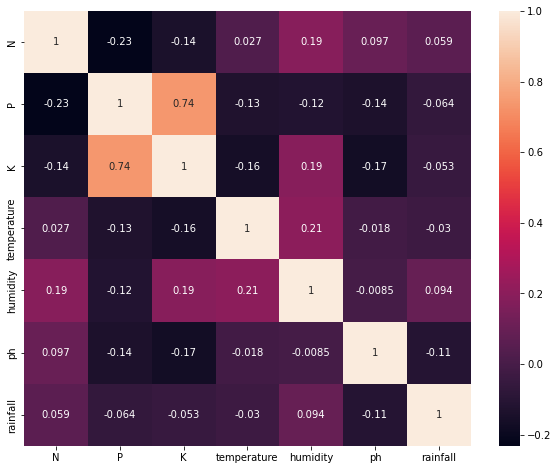

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cor, annot= True)

In [25]:
corr=data.corr()
corr

,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


<AxesSubplot:>

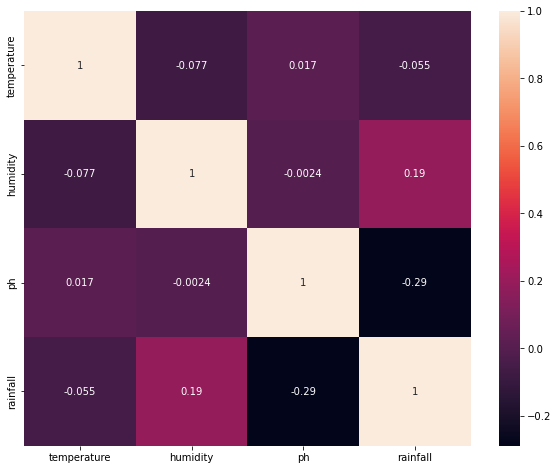

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot= True)

In [27]:
df=pd.read_csv('csv')
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [28]:
corrp=df.corr()
corrp

,min_price,max_price,modal_price
min_price,1.000000,0.975526,0.985341
max_price,0.975526,1.000000,0.994260
modal_price,0.985341,0.994260,1.000000


<AxesSubplot:>

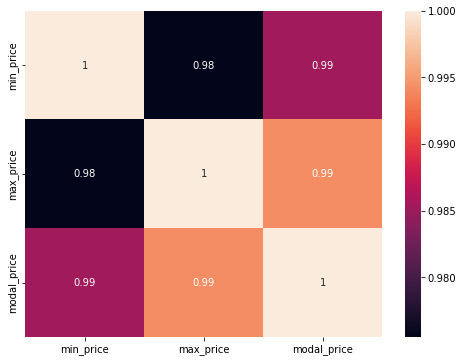

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(data=corrp, annot= True)

In [36]:
train=data.iloc[:, 0:4].values
test=data.iloc[: ,4:].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.3)


In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2170, 4) (930, 4) (2170, 1) (930, 1)


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()

In [50]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,pred)
print("The accuracy of this model is: ", a*100)

NameError: name 'pred' is not defined

In [52]:
kunu=pd.read_csv("csv")
kunu.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [55]:
data.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [56]:
kunu.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


In [57]:
kunu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [58]:
cp['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)